In [43]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [44]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
text = open('/content/drive/MyDrive/NNDL/dataset.txt', "r", encoding='utf-8').read()
print(text[:700])

HARRY POTTER AND THE GOBLET OF FIRE

CHAPTER ONE - THE RIDDLE HOUSE

	The villagers of Little Hangleron still called it "the Riddle House," even though it had been many years since the Riddle family had lived there.  It stood on a hill overlooking the village, some of its windows boarded, tiles missing from its roof, and ivy spreading unchecked over its face.  Once a fine-looking manor, and easily the largest and grandest building for miles around, the Riddle House was now damp, derelict, and unoccupied.
	The Little Hagletons all agreed that the old house was "creepy."  Half a century ago, something strange and horrible had happened there, something that the older inhabitants of the village 


In [46]:
a=[]
for c in text :
   if not c.isalpha():
     if not c==' ':
       a.append(c)
b=set(a)

In [47]:
b

{'\t',
 '\n',
 '!',
 '"',
 "'",
 '(',
 ')',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '6',
 '7',
 '9',
 ':',
 ';',
 '?',
 '^',
 '_',
 '}',
 '•'}

In [48]:
data=text.lower()
for c in b:
  data= data.replace(c,"" )


In [49]:
print(data[:500])

harry potter and the goblet of firechapter one  the riddle housethe villagers of little hangleron still called it the riddle house even though it had been many years since the riddle family had lived there  it stood on a hill overlooking the village some of its windows boarded tiles missing from its roof and ivy spreading unchecked over its face  once a finelooking manor and easily the largest and grandest building for miles around the riddle house was now damp derelict and unoccupiedthe little 


In [50]:
chars= sorted(set(data))

In [51]:
data= data.replace(chars[27],"" )

In [52]:
chars=chars[:27]
chars

[' ',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [53]:
c_to_i = dict((c, i) for i, c in enumerate(chars))
i_to_c = dict((i, c) for i, c in enumerate(chars))

In [64]:
batch =60
x = np.zeros((len(data)-batch, batch, len(chars)), dtype=np.bool)
y = np.zeros((len(data)-batch, len(chars)), dtype=np.bool)
for i in range(len(data) - batch): 
    for j in range(batch):
      x[i, j, c_to_i[data[i+j]]] = 1
    y[i, c_to_i[data[i + batch]]] = 1   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [69]:
import sklearn
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM 
from tensorflow.keras.optimizers import SGD , Adam
model = Sequential()
model.add(LSTM(128, input_shape=(batch, len(chars))))
model.add(Dropout(0.2))
# model.add(LSTM(128, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(64))
# model.add(Dropout(0.2))
model.add(Dense(len(chars), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 128)               79872     
                                                                 
 dropout_26 (Dropout)        (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 27)                3483      
                                                                 
Total params: 83,355
Trainable params: 83,355
Non-trainable params: 0
_________________________________________________________________


In [70]:
trainlog = model.fit(x, y,batch_size=60,epochs=4,validation_split=0.2)

Epoch 1/4
13920/13920 [==============================] - 110s 8ms/step - loss: 1.9002 - accuracy: 0.4337 - val_loss: 1.6097 - val_accuracy: 0.5095
Epoch 2/4
13920/13920 [==============================] - 107s 8ms/step - loss: 1.5930 - accuracy: 0.5175 - val_loss: 1.4800 - val_accuracy: 0.5456
Epoch 3/4
13920/13920 [==============================] - 106s 8ms/step - loss: 1.5055 - accuracy: 0.5427 - val_loss: 1.4261 - val_accuracy: 0.5621
Epoch 4/4
13920/13920 [==============================] - 97s 7ms/step - loss: 1.4585 - accuracy: 0.5559 - val_loss: 1.3944 - val_accuracy: 0.5722


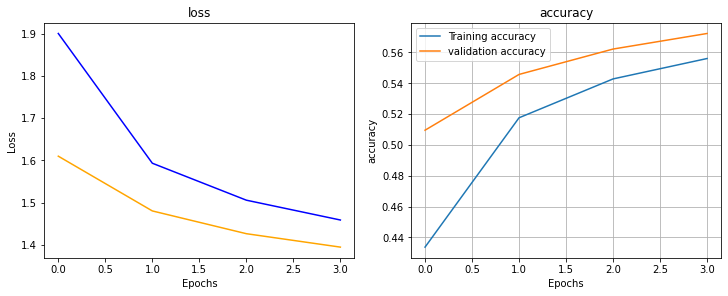

In [71]:
loss_train = trainlog.history['loss']
loss_val = trainlog.history['val_loss']
accu_train = trainlog.history['accuracy']
accu_val = trainlog.history['val_accuracy']
epochs=range(4)
f,ax=plt.subplots(1,2,figsize=(10,4),constrained_layout=True)
ax[0].plot(epochs, loss_train,color='blue', label='Training loss')
ax[0].plot(epochs, loss_val,color='orange', label='validation loss')
ax[0].set(title='loss',xlabel='Epochs',ylabel='Loss')
ax[1].plot(epochs, accu_train, label='Training accuracy')
ax[1].plot(epochs, accu_val, label='validation accuracy')
ax[1].set(title='accuracy',xlabel='Epochs',ylabel='accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [72]:
def sample(preds):
	preds = np.asarray(preds).astype('float64')
	preds = np.log(preds)
	exp_preds = np.exp(preds)
	preds = exp_preds / np.sum(exp_preds)
	probas = np.random.multinomial(1, preds, 1)
	return np.argmax(probas)

In [77]:
import random
start_index = random.randint(0, len(text) - batch  - 1)

In [78]:
generated_text = data[start_index: start_index + batch ]
input=generated_text
for i in range(200):
    generated_int=np.zeros((1, batch, len(chars)))
    for t, char in enumerate(input):
      generated_int[0, t, c_to_i[char]] = 1.
    preds = model.predict(generated_int)[0]
    next_index = sample(preds)
    next_char = i_to_c[next_index]
    generated_text +=next_char
    input=input[1:]+next_char
print(generated_text)


thing could have prepared me for it  i was ripped from my boxwhat allia sled his eyes couldnt wanddwearing as he said with the dark tory had profrses you with the dlras medoest from up over beton the pounded went to said liketrew for proper of the extraor of f
